# Grafi bipartiti e un'analisi di una Human Disease Network

## Librerie e dataset

NetworkX è una libreria molto utilizzata per la creazione e la manipolazione dei grafi in Python.<br>
In essa è presente un modulo dedicato ai grafi bipartiti.<br>
Per la rappresentazione dei grafi NetworkX può utilizzare l'interfaccia di Matplotlib.

In [1]:
import networkx as nx
from networkx.algorithms import bipartite as bp
import matplotlib.pyplot as plt
import pandas as pd

!git clone https://github.com/manuel-dileo/not-so-simple-graph-visualization.git

Cloning into 'not-so-simple-graph-visualization'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 139 (delta 33), reused 109 (delta 16), pack-reused 0
Receiving objects: 100% (139/139), 14.59 MiB | 19.01 MiB/s, done.
Resolving deltas: 100% (33/33), done.


## Creazione di un grafo bipartito partendo da un dataset

In NetworkX non viene dedicata una classe ai grafi bipartiti.
E' quindi consigliabile utilizzare l'attributo `bipartite` quando si crea un grafo con la classe `Graph()` o `DiGraph()`.

Utilizzando la funzione `parse_edgelist` ad ogni nodo viene assegnato automaticamente il valore all'attributo `bipartite` (0 oppure 1 in base alla partizione di appartenenza del nodo).

NetworkX mette a disposizione la funzione `is_bipartite` che restituisce `True` se il grafo è bipartito e `False` in caso contrario.

Inoltre, vi è la possibilità di posizionare i nodi secondo il classico layout dei grafi bipartiti utilizzando la funzione `bipartite_layout`.

Numero di nodi: 40
Numero di edge: 95
Il grafo è bipartito? True
Numero di nodi del primo sottoinsieme: 25
Numero di nodi del secondo sottoinsieme: 15


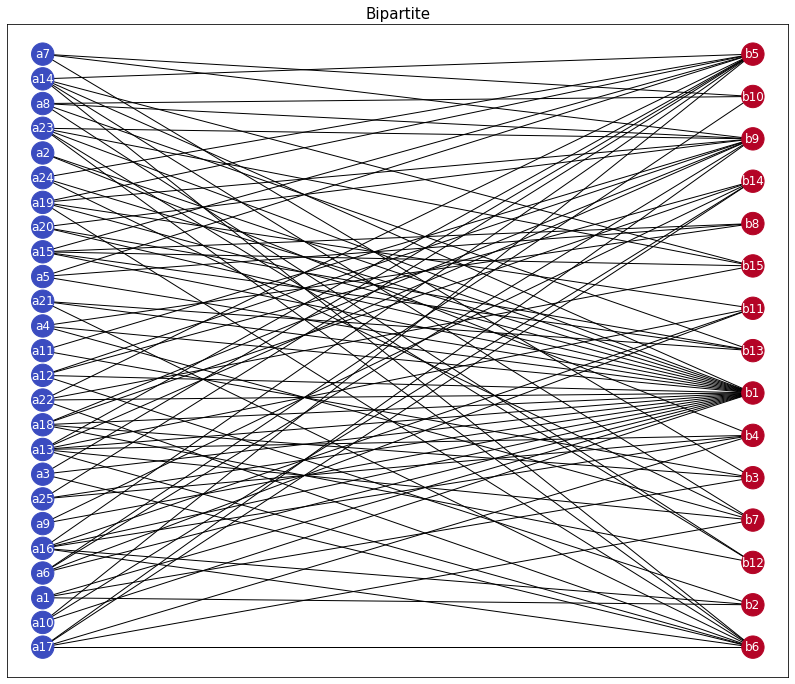

In [2]:
# Carica l'edgelist del grafo
B_txt = open('not-so-simple-graph-visualization/bipartite_graphs/dataset/small_bipartite_graph.edgelist', 'r')
B = bp.parse_edgelist(B_txt, comments='%', delimiter=' ')

# Stampa il numero di nodi e edge
print('Numero di nodi:', nx.number_of_nodes(B))
print('Numero di edge:',nx.number_of_edges(B))

# Verifica che il grafo sia bipartito
print('Il grafo è bipartito?', bp.is_bipartite(B))

# Assegna a due variabili i due sottoinsiemi del grafo bipartito e ne stampa le cardinalità
top_nodes, bottom_nodes = bp.sets(B)
print('Numero di nodi del primo sottoinsieme:', len(top_nodes))
print('Numero di nodi del secondo sottoinsieme:', len(bottom_nodes))

# Disegna il grafo con il layout bipartito e colora i nodi in base all'attributo bipartite
bip_attr = [node[1].get('bipartite') for node in B.nodes(data=True)]

plt.figure(figsize=(14,12))
plt.title(label='Bipartite', fontdict={'fontsize':15})

pos = nx.bipartite_layout(B, top_nodes)
nx.draw_networkx(B, pos=pos, cmap=plt.cm.coolwarm, node_color=bip_attr, with_labels=True, font_color='white', node_size=500)

# Confronto tra i layout di un grafo bipartito e il *Zachary's karate club*



In [3]:
# Crea il Zachary's karate club
K = nx.karate_club_graph()

# Stampa il numero di nodi ed edge e lo disegna
print('Numero di nodi:', nx.number_of_nodes(K))
print('Numero di edge:', nx.number_of_edges(K))

Numero di nodi: 34
Numero di edge: 78


### Layout circolare
Possibile utilizzando il layout `circular_layout`.

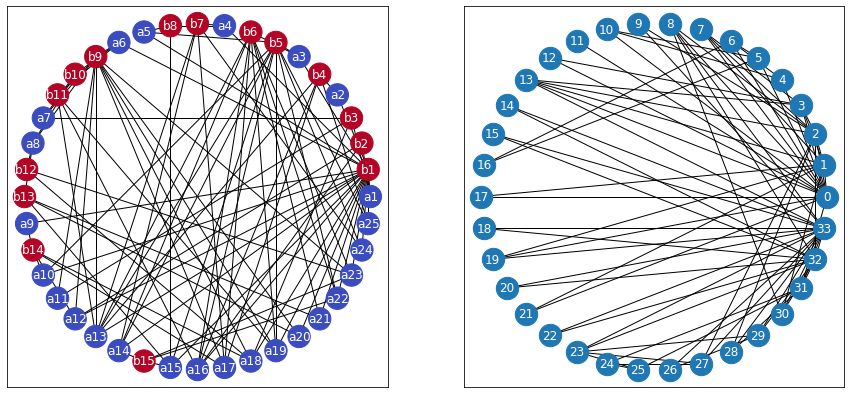

In [4]:
plt.figure(figsize=(15,7))

plt.subplot(121)
nx.draw_networkx(B, pos=nx.circular_layout(B), with_labels=True, cmap=plt.cm.coolwarm, node_color=bip_attr, font_color='white', node_size=500)

plt.subplot(122)
nx.draw_networkx(K, pos=nx.circular_layout(K), with_labels=True, font_color='white', node_size=500)

### Kamada Kawai layout
Possibile utilizzando il layout `kamada_kawai_layout`.

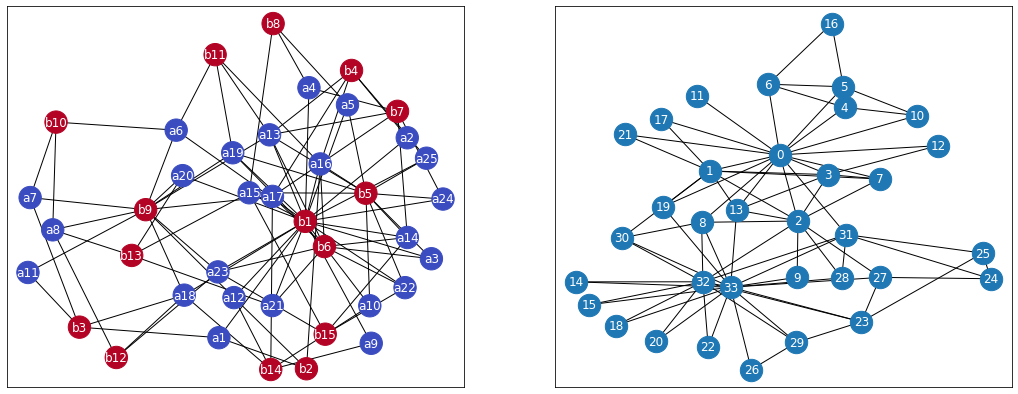

In [5]:
plt.figure(figsize=(18,7))

plt.subplot(121)
nx.draw_networkx(B, pos=nx.kamada_kawai_layout(B), cmap=plt.cm.coolwarm, node_color=bip_attr, with_labels=True, font_color='white', node_size=500)

plt.subplot(122)
nx.draw_networkx(K, pos=nx.kamada_kawai_layout(K), with_labels=True, font_color='white', node_size=500)

### Spring layout
Possibile utilizzando il layout `spring_layout`.

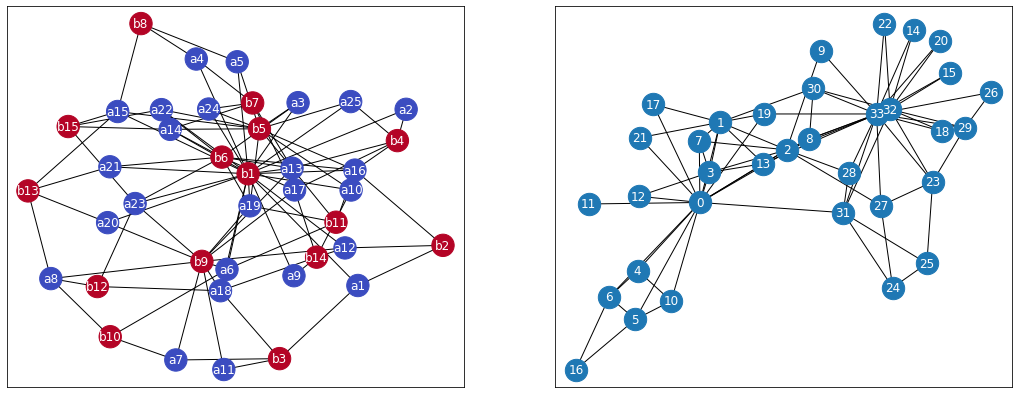

In [6]:
plt.figure(figsize=(18,7))

plt.subplot(121)
nx.draw_networkx(B, pos=nx.spring_layout(B), cmap=plt.cm.coolwarm, node_color=bip_attr, with_labels=True, font_color='white', node_size=500)

plt.subplot(122)
nx.draw_networkx(K, pos=nx.spring_layout(K), with_labels=True, font_color='white', node_size=500)

### Spectral layout
Possibile utilizzando il layout `spectral_layout`.

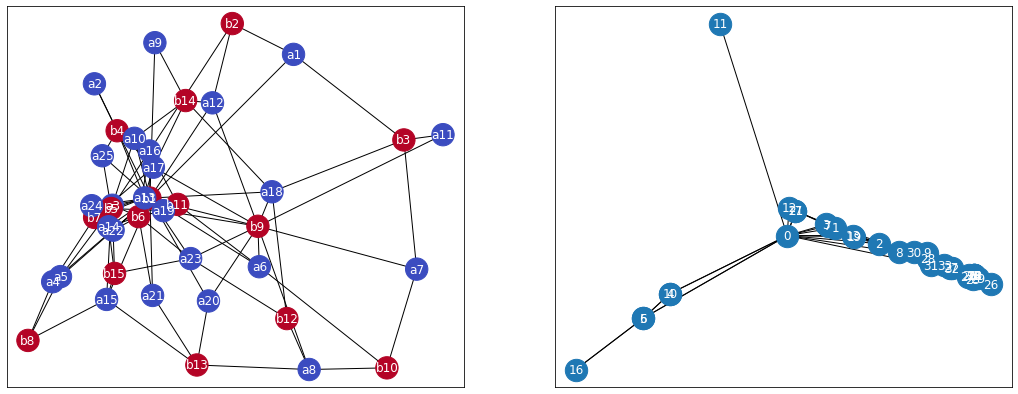

In [7]:
plt.figure(figsize=(18,7))

plt.subplot(121)
nx.draw_networkx(B, pos=nx.spectral_layout(B), cmap=plt.cm.coolwarm, node_color=bip_attr, with_labels=True, font_color='white', node_size=500)
plt.subplot(122)
nx.draw_networkx(K, pos=nx.spectral_layout(K), with_labels=True, font_color='white', node_size=500)

# Hiveplot

Solitamente, le reti vengono rappresentate con *force-base* o *spectral* layout. Questi layout sono difficili da interpretare e poco adatti a confrontare reti, sopratutto se esse sono di grosse dimensioni
([esempio](http://www.google.ca/images?q=network%20yeast)).

Hiveplot cerca di creare delle visualizzazioni significative e riproducibili le quali permettano di effettuare intuitivamente un confronto tra le reti.

Per fare questo, Hiveplot crea degli assi (solitamente 3, sviluppati radialmente) e distribuisce i nodi della rete su questi assi in funzione delle caratteristiche strutturali dei nodi stessi.
Una volta posizionati tutti i nodi, vengono creati gli archi che li collegano.

L'utilizzo di questo sistema di coordinate rende gli hiveplot versatili e adatti ad esaminare una rete sotto più aspetti.<br>
E' possibile, infatti, generare più hiveplot della stessa rete scegliendo diverse caratteristiche da valutare nell'assegnamento dei nodi ad un asse.

Nella mia analisi ho creato 3 assi assegnando a ciascun asse i nodi con un determinato valore del loro *clustering coefficient*.
Successivamente ho ordinato i nodi di ogni asse in base alla loro *degree*

Ricordo che per *degree* s'intende il numero di archi connessi a un nodo, per grafi diretti essa si divide in *in dregee* e *out degree*; mentre per *clustering coefficient* di un nodo s'intende: una misura che indica quanto i nodi del vicinato, assieme al nodo in questione, tendano a formare una *clique* (grafo completo).

### Coefficiente di clustering nei grafi bipartiti

Nei grafi, il coefficiente di clustering si calcola con la seguente formula:<br>

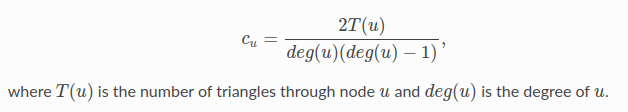

Importante è notare che, in un grafo bipartito, per via delle sue proprietà, non è possibile la formazione di triangoli. Quindi è necessario adattare la formula per calcolare il coefficiente di clustering nei grafi bipartiti.

La formula diventa quindi:<br>
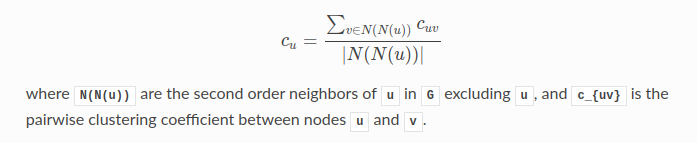


Come si vede, il coefficiente si calcola andando ad esaminare il vicinato del vicinato del nodo in questione. Difatti, l'elemento al numeratore è il [*coefficiente di similarità di Jaccard*](https://it.wikipedia.org/wiki/Indice_di_Jaccard) relativo ai nodi del vicinato di secondo ordine.

Immagini prese dalla [documentazione di Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.cluster.clustering.html#networkx.algorithms.bipartite.cluster.clustering://).

In [8]:
!pip install pyveplot

     |████████████████████████████████| 71kB 4.5MB/s 


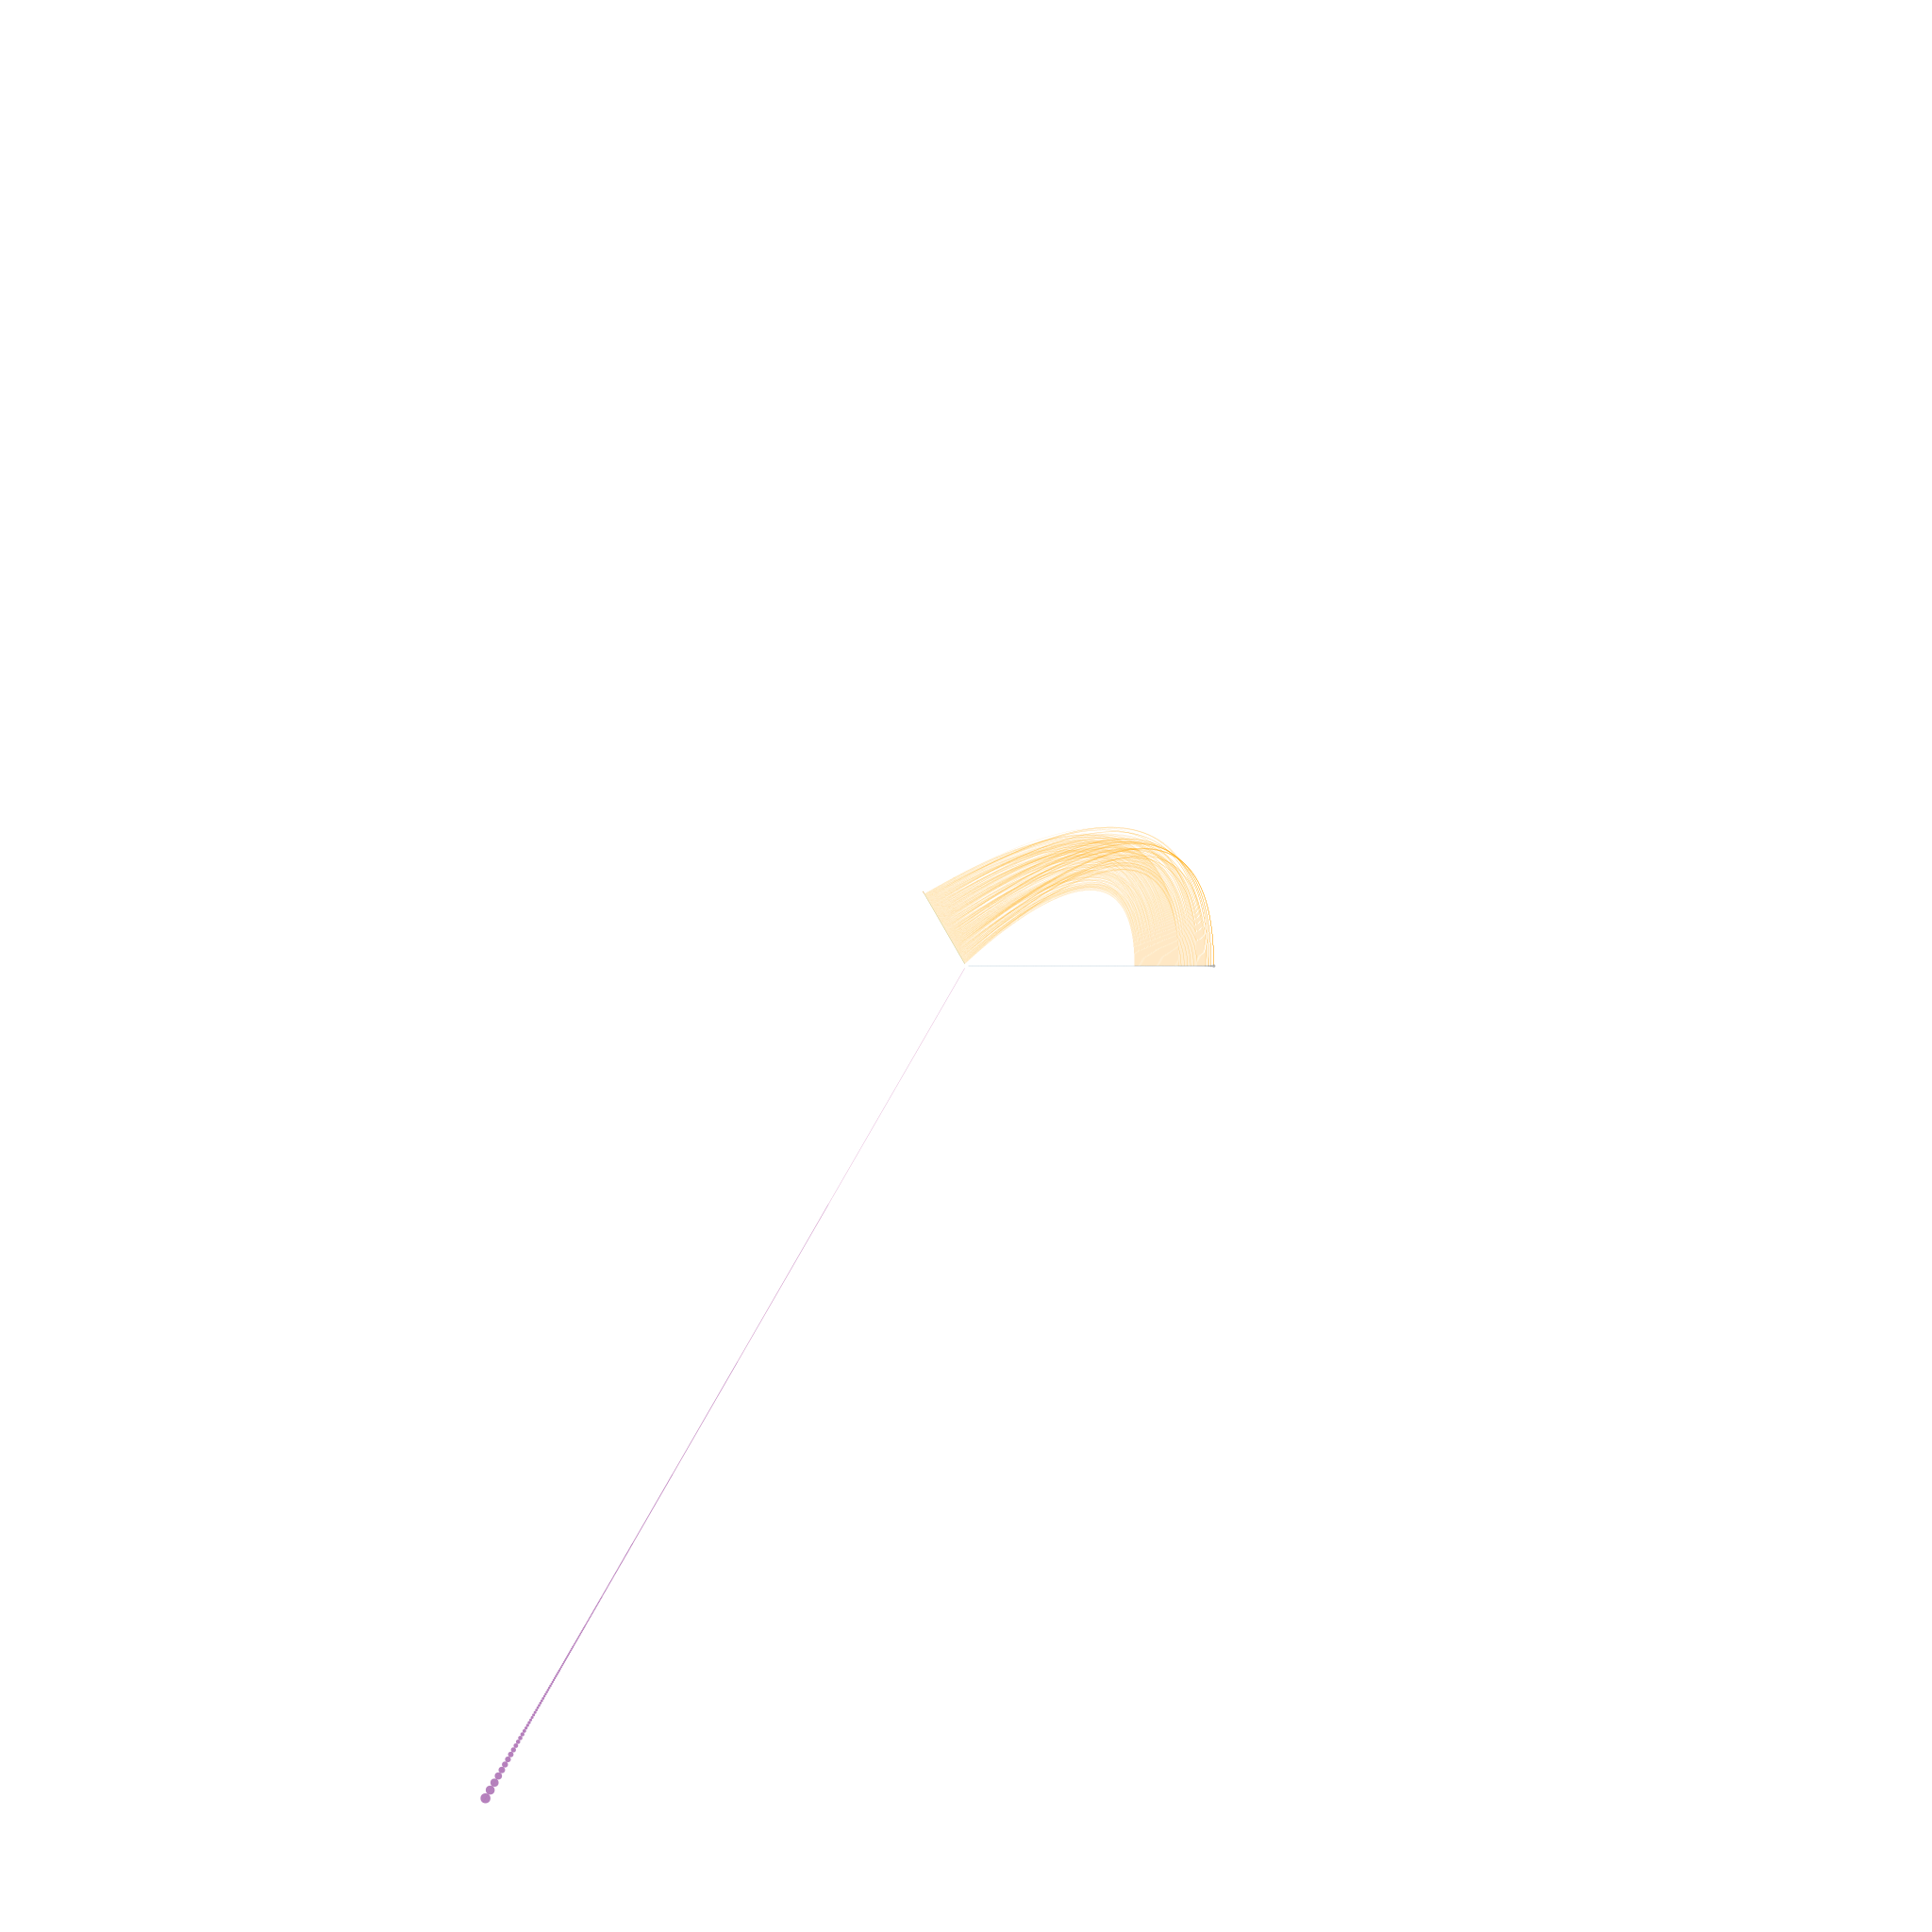

In [9]:
from pyveplot import Hiveplot, Axis, Node
import random

c = ['#e41a1c', '#377eb8', '#4daf4a',
     '#984ea3', '#ff7f00', '#ffff33',
     '#a65628', '#f781bf', '#999999',]

# crea l'oggetto hiveplot
h = Hiveplot()

# crea tre assi, distanziati di 120 gradi tra loro
h.axes = [Axis(start=20, angle=0,
            stroke=random.choice(c), stroke_width=1.1),
          Axis(start=20, angle=120,
            stroke=random.choice(c), stroke_width=1.1),
          Axis(start=20, angle=120 + 120,
            stroke=random.choice(c), stroke_width=1.1)]

# carica la rete bipartita
G_file = open('not-so-simple-graph-visualization/bipartite_graphs/dataset/bipartite.net', 'r')
G = bp.parse_edgelist(G_file, comments='#', delimiter='\t')

# dividi i nodi in base al coefficiente di clustering
cc = bp.clustering(G)
cc_min = [k for k in cc if cc[k]==0]  # coefficiente di clustering = 0
cc_med = [k for k in cc if 0<cc[k]<1] # coefficiente di clustering compreso tra 0 e 1
cc_max = [k for k in cc if cc[k]==1]  # coefficiente di clustering = 1

# ordina i nodi in base alla degree
cc_min = list(nx.degree(G, cc_min))
cc_med = list(nx.degree(G, cc_med))
cc_max = list(nx.degree(G, cc_max))

cc_min.sort(key=lambda tup: tup[1])
cc_med.sort(key=lambda tup: tup[1])
cc_max.sort(key=lambda tup: tup[1])

cc_min = [x[0] for x in cc_min]
cc_med = [x[0] for x in cc_med]
cc_max = [x[0] for x in cc_max]

# posiziona i nodi sui tre assi
for axis, nodes in zip(h.axes,
                        [cc_min, cc_med, cc_max]):
  circle_color = random.choice(c)
  for v in nodes:
    # crea l'ggetto nodo
    node = Node(radius=G.degree(v),
                label="node %s k=%s" % (v, G.degree(v)))
    # lo aggiunge all'asse
    axis.add_node(v, node)
    # disegna un cerchio rappresentante il nodo
    node.add_circle(fill=circle_color, stroke=circle_color,
                    stroke_width=0.1, fill_opacity=0.7)
    if axis.angle < 180:
      orientation = -1
      scale = 0.6
    else:
      orientation = 1
      scale = 0.35

# scorre gli assi
for n in range(-1, len(h.axes) - 1):
  curve_color = random.choice(c)
  if n == -1: curve_color = '#ffa500' # arancione
  # disegna curve tra nodi connessi nella rete
  h.connect_axes(h.axes[n],
                  h.axes[n+1],
                  G.edges,
                  stroke_width=0.5,
                  stroke=curve_color)

# salva l'output in formato .svg
h.save('hiveplot.svg')

from IPython.display import SVG
# mostra il file svg
SVG('hiveplot.svg')

Sdoppiando gli assi...

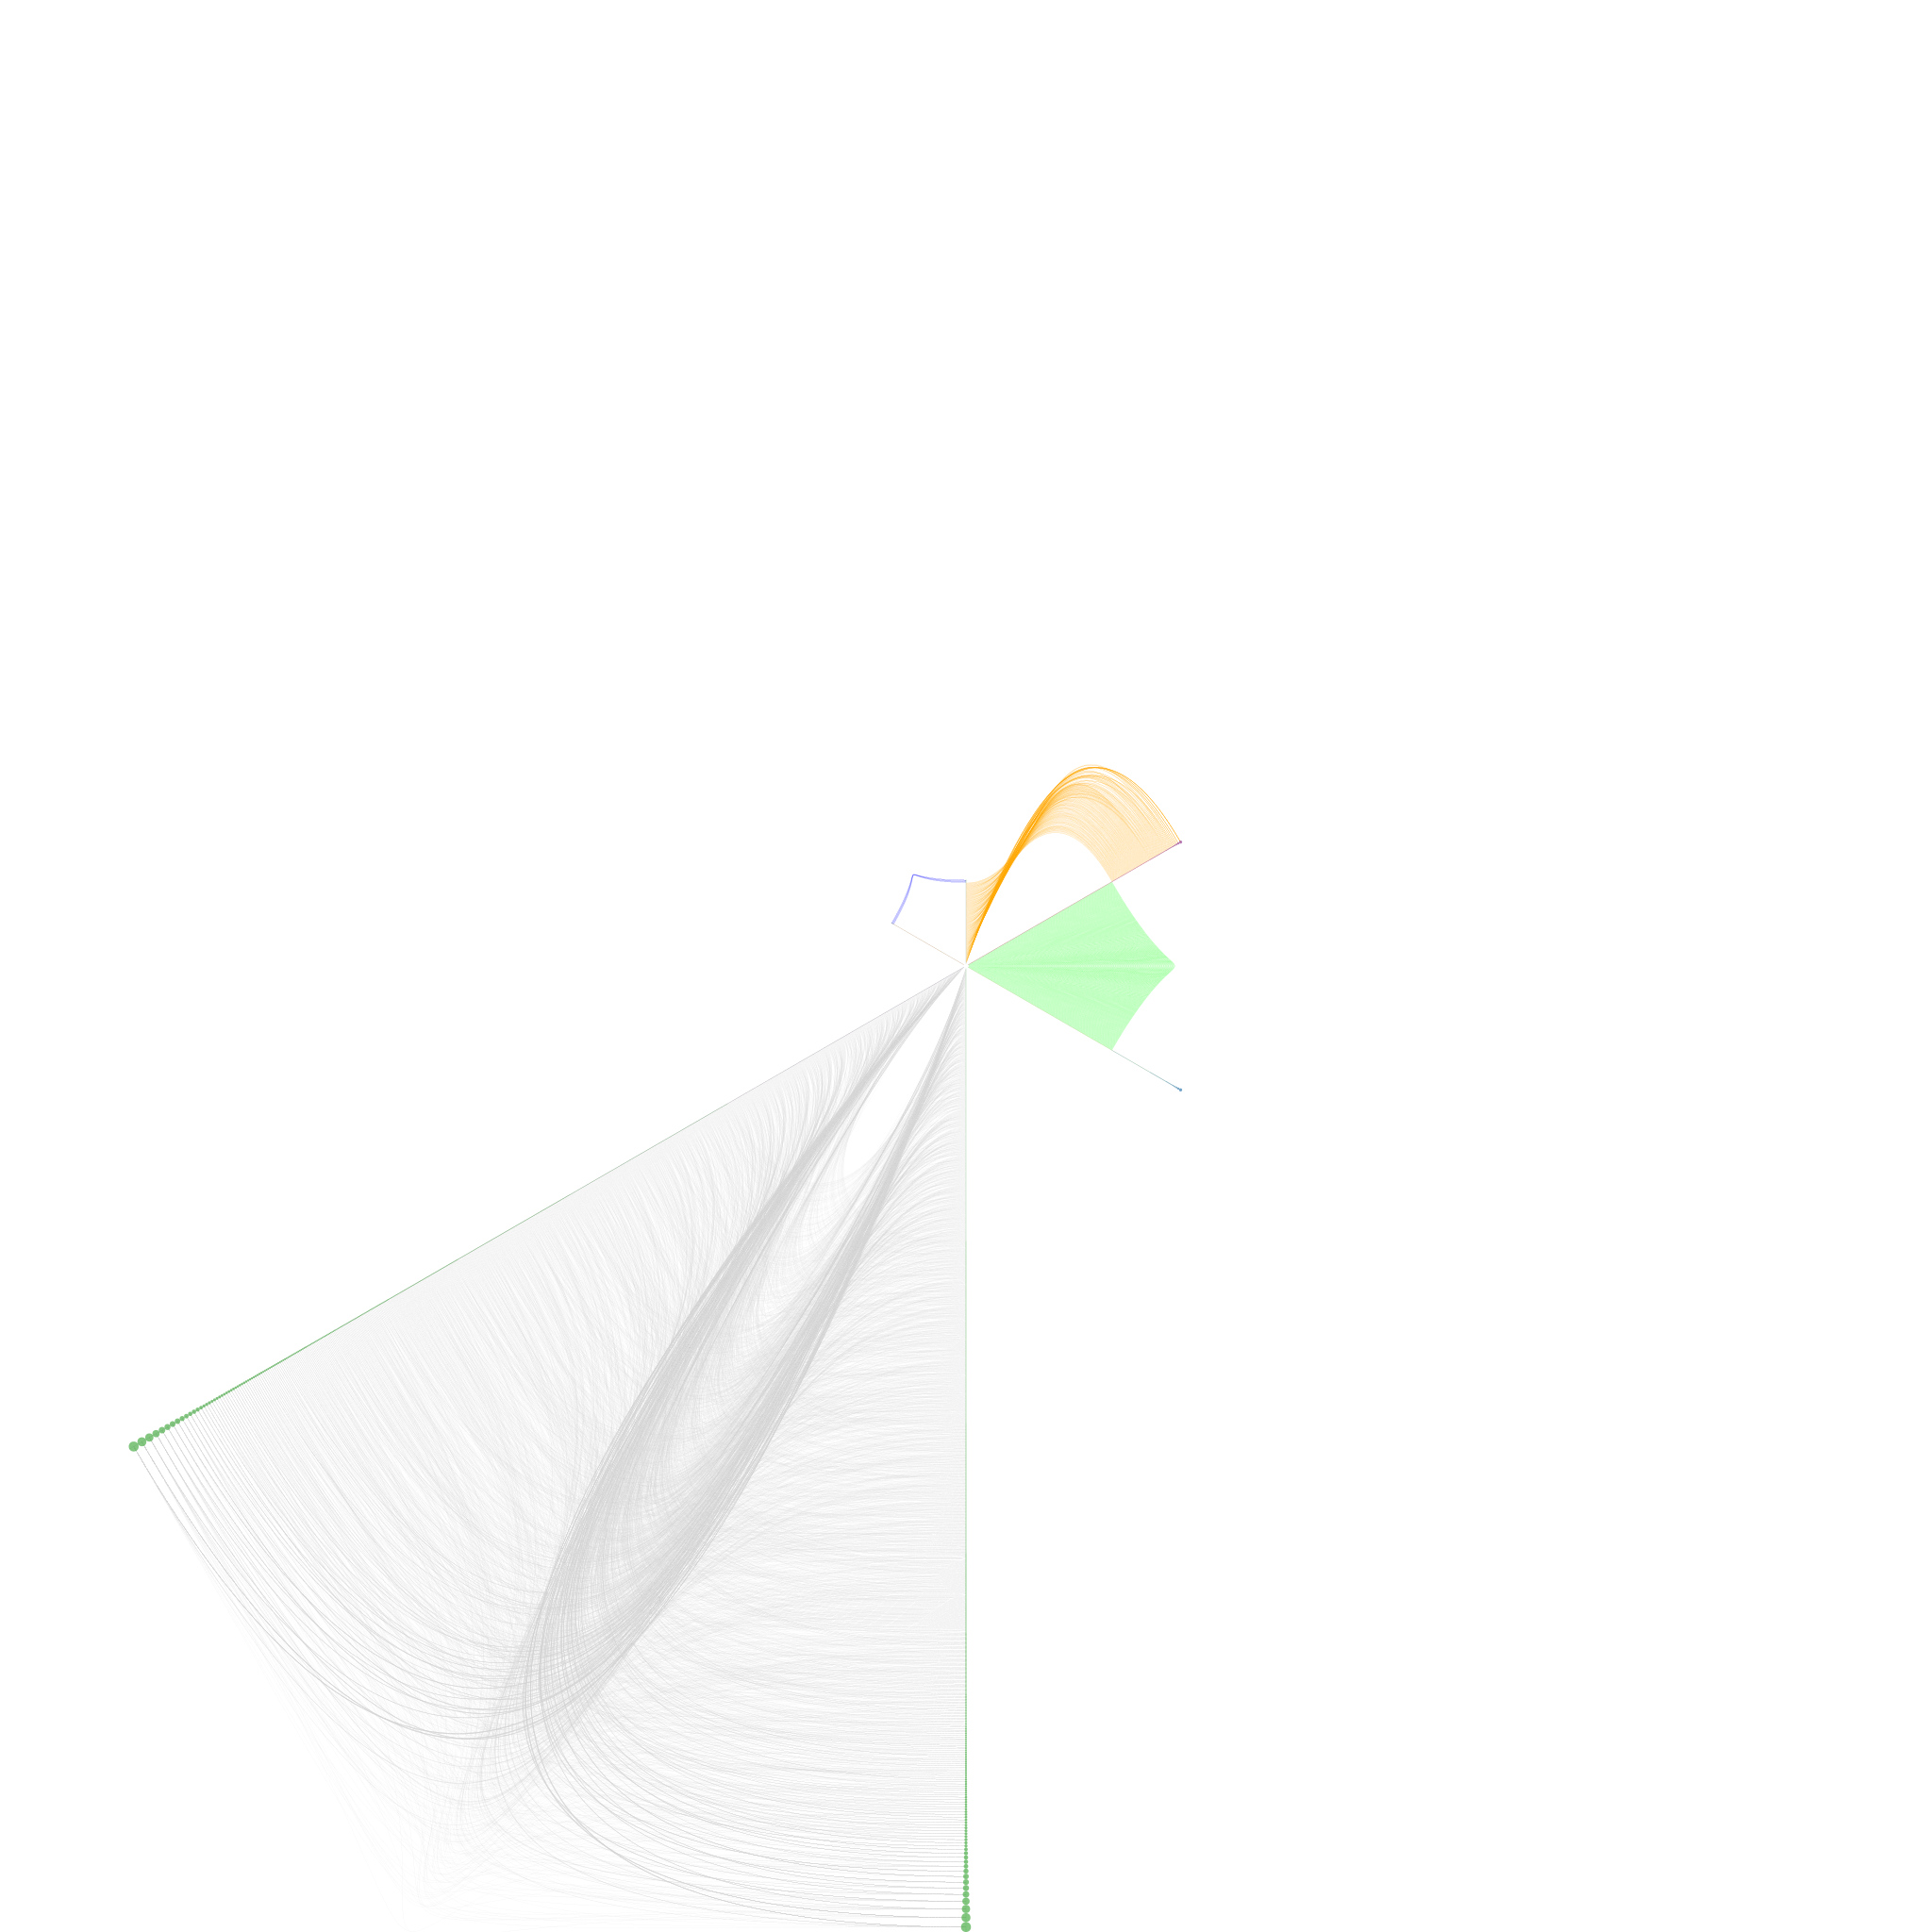

In [10]:
SVG('not-so-simple-graph-visualization/bipartite_graphs/images/hiveplot_duplicated_axes.svg')

Dal grafico si evince che non esistono collegamenti tra nodi con cc=0 o cc=1 e nodi con 0<cc<1; dove cc è il coefficiente di clustering.

Questo poiché il grafo non è connesso ma è diviso in tante componenti connesse. Una componente connessa è un sottografo indotto dai nodi, connesso e massimale. Se ci fosse un collegamento tra un nodo con cc tra 0 e 1 e un altro nodo la componente non sarebbe massimale.

In [11]:
print('Numero di componenti connesse:', len(list((nx.connected_components(G)))))

Numero di componenti connesse: 540


## Conformazione di un grafo bipartito in funzione del coefficiente di clustering
#### Grafo bipartito in cui i nodi di entrambe le partizioni hanno cc=0
In questo caso si ha che una malattia insorge a causa della mutazione di uno e un solo gene, e questo gene non partecipa all'insorgenza di nessun'altra malattia.

Coefficiente di clustering: {'A': 0.0, 'B': 0.0}


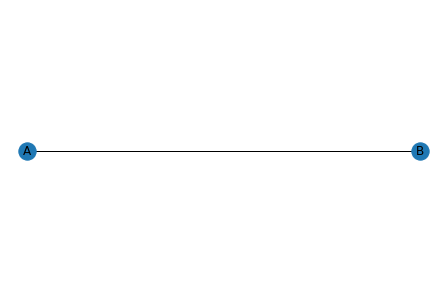

In [12]:
edge_list = [('A', 'B')]
T = nx.Graph()
T.add_edges_from(edge_list)
nx.is_bipartite(T)

set1, set2 = bp.sets(T)
nx.draw(T, pos=nx.bipartite_layout(T,set1), with_labels=True)

print('Coefficiente di clustering:', bp.clustering(T))

#### Grafo bipartito in cui i nodi di una partizione hanno cc=0 e i nodi dell'altra partizione hanno cc=1
In questo caso si ha che l'insorgenza di una malattia è causata dalla mutazione di più geni, e questi geni non partecipano all'insorgenza di nessun'altra malattia.

Coefficiente di clustering: {'A': 0.0, 'B': 1.0, 'C': 1.0, 'D': 1.0}


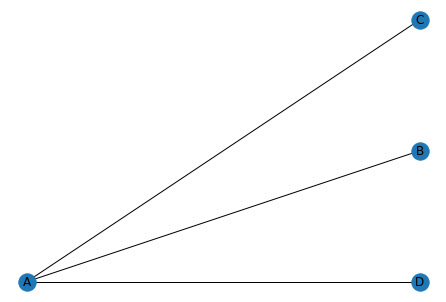

In [13]:
edge_list = [('A', 'B'),('A','C'),('A','D')]
T = nx.Graph()
T.add_edges_from(edge_list)
nx.is_bipartite(T)

set1, set2 = bp.sets(T)
nx.draw(T, pos=nx.bipartite_layout(T,set1), with_labels=True)

print('Coefficiente di clustering:', bp.clustering(T))

#### Grafo bipartito in cui i nodi di entrambe le partizioni hanno cc=1
In questo caso si ha che l'insorgenza di una malattia è causata dalla mutazione di più geni, i quali partecipano, tutti e soli, all'insorgenza di altre malattie.

Coefficiente di clustering: {'A': 1.0, 'D': 1.0, 'E': 1.0, 'F': 1.0, 'B': 1.0, 'C': 1.0}


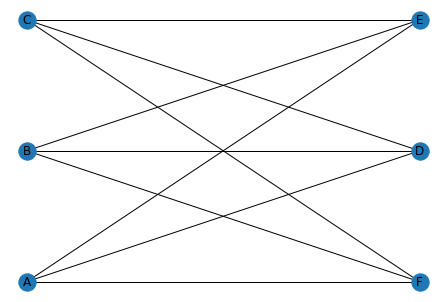

In [14]:
edge_list = [('A', 'D'),('A', 'E'),('A', 'F'),('B', 'D'),('B', 'E'),('B', 'F'),('C', 'D'),('C', 'E'),('C', 'F'),]
T = nx.Graph()
T.add_edges_from(edge_list)
nx.is_bipartite(T)

set1, set2 = bp.sets(T)
nx.draw(T, pos=nx.bipartite_layout(T,set1), with_labels=True)

print('Coefficiente di clustering:', bp.clustering(T))

# Proiezione di un grafo bipartito
E' possibile effettuare una proiezione pesata di un grafo bipartito utilizzando la funzione `weighted_projected_graph` del modulo `bipartite` che chiede in inupt il grafo ed i nodi su cui effettuare la proiezione. Vi è un terzo parametro opzionale che va a modificare il modo in cui vengono calcolati i pesi degli archi.

Altre modalità di proiezione sono spiegate nella [documentazione di networkx](https://networkx.org/documentation/stable//reference/algorithms/bipartite.html#module-networkx.algorithms.bipartite.projection)

Nel mio studio ho utilizzato il [dataset](http://barabasi.com/f/909.zip) relativo alla Human Disease Network disponibile liberamente sul [Barabási Lab](https://www.barabasilab.com/).

In [15]:
# importa il dataset realtivo al Diseasome
D_file = open('not-so-simple-graph-visualization/bipartite_graphs/dataset/bipartite.net', 'r')
D = bp.parse_edgelist(D_file, comments='#', delimiter='\t')

# esegue la proiezione del Diseasome sui nodi delle malattie per generare la Human Disease Network
if bp.is_bipartite(D):
  diseases = {n for n, d in D.nodes(data=True) if d["bipartite"] == 0}
  genes = set(D) - diseases

  I = bp.weighted_projected_graph(D, diseases)
  print('Numero di nodi della proiezione:', I.number_of_nodes())
  print('Numero di archi della proiezione:', I.number_of_edges())

else: print('Il grafo non è biparito')

Numero di nodi della proiezione: 1284
Numero di archi della proiezione: 1527


# Diagramma di Sankey
I diagrammi di Sankey vengono utilizzati per rappresentare il flusso tra i nodi di una rete.
I nodi sono raffigurati come rettangoli e l'altezza rappresenta la loro degree. I link sono rappresentati come linee curve il cui spessore è proporziale al peso del link stesso.
<br>
<br>
Attraverso il diagramma di Sankey ho voluto visualizzare le relazioni tra le venti patologie oncologiche con maggiore degree.

Ricordo che il peso di un link tra due malattie rappresenta il numero di geni che esse condividono.





In [16]:
# importa dal dataset la Human Disease Network
X = nx.read_edgelist('not-so-simple-graph-visualization/bipartite_graphs/dataset/disease.net.w', nodetype=int, data=(('weight', int),))

# importa un csv che, per ogni patologia oncologica, riporta il relativo nome e ID utilizzato nel dataset
cancer_df = pd.read_csv('not-so-simple-graph-visualization/bipartite_graphs/dataset/cancers.csv')

cancer_IDs = cancer_df.cancer_ID.to_list()
cancer_names = cancer_df.cancer_name.to_list()

# crea il sottografo della Human Disease Network relativo alla sole patologie oncolgiche
C = X.subgraph(cancer_IDs)

# seleziona i venti nodi con maggiore degree
high_deg_nodes = [tup[0] for tup in sorted(C.degree(), key=lambda tup: tup[1], reverse=True)[:20]]
C = C.subgraph(high_deg_nodes)

# crea due liste e assegna rispettivamente l'ID e il nome delle venti malattie
high_deg_cancer_IDs = []
high_deg_cancer_names = []
for index, row in cancer_df.iterrows():
  if row['cancer_ID'] in high_deg_nodes:
    high_deg_cancer_IDs.append(row['cancer_ID'])
    high_deg_cancer_names.append(row['cancer_name'])

# crea un dataframe con il contenunto delle due liste
high_deg_cancer_df = pd.DataFrame(data={'cancer_ID': high_deg_cancer_IDs, 'cancer_name': high_deg_cancer_names})

# scorre tutti gli edge del sottografo e salva in tre liste rispettivamente i nodi sorgente, destinazione e peso dell'arco
src = [edge[0] for edge in C.edges(data=True)]
trg = [edge[1] for edge in C.edges(data=True)]
values = [edge[2].get('weight') for edge in C.edges(data=True)]

# crea due liste contenenti gli indici posizionali dei nodi sorgente e destinazione rispetto alla lista 'cancer_names'
src_indexes = []
trg_indexes = []
for item in src:
  for index, id in cancer_df.cancer_ID.items():
    if id == item: src_indexes.append(index)

for item in trg:
  for index, id in cancer_df.cancer_ID.items():
    if id == item: trg_indexes.append(index)

In [17]:
import plotly.graph_objects as go

# crea la figura
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 30,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = cancer_names, # questa è la lista di riferimento che verrà usata per indicare i nodi sorgente e destinazione
      color = 'yellow'
    ),
    link = dict(
      source = src_indexes, # indici dei nodi sorgente
      target = trg_indexes, # indici dei nodi destinazione
      value = values, # peso degli archi
  ))])

# alcune impostazioni grafiche
fig.update_layout(title_text="Cancer's network", font_size=14, autosize=False,
    width=1000,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),)

fig.show()

La figura evidenzia chiaramente la presenza di due patologie dominanti; le quali hanno molti geni in comune con diverse altre patologie.
Esse sono il cancro al colon e il cancro al seno.<br>
In particolare il cancro al colon è collegato a tutte le altre patologie fatta eccezione per il cancro alla prostata e il meningioma.<br>
Similmente il cancro al seno è connesso a tutti gli altri nodi esclusi il meningioma, il glioblastoma e la neurofibromatosi.

